In [ ]:
# Aug 5th_online shopping

(1)Clustering- grouping the customer--- buying pattern
Recency,Frequency,Monetary.
(2)Identify the business trend-- day,month,season,timing...
(3)Recommendation engine-- 
(4)Life time valuation of the customer..

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [67]:
original_data=pd.read_excel("Online_shopping.xlsx")

In [68]:
df=original_data.copy()
df.head(2)

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


(1)Clustering- grouping the customer--- buying pattern
Recency,Frequency,Monetary.

In [8]:
#df["Country"].value_counts(normalize=True)

In [ ]:
# to solve the first problem statement -- only keep the reqiored columns

In [70]:
df1=df.drop(["StockCode","lower","Description","Country"],axis=1)

In [71]:
df1.head(2)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [72]:
df1.isnull().sum()

InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [73]:
# we can not retrieve the cust_id if the cumtomer is not willing to disclose

In [74]:
df1.dropna(axis=0,inplace=True)

In [75]:
df1.isnull().sum()

InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [76]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


In [ ]:
# the quantity is -ve --> Refund / defective item

In [ ]:
# unit price 0 ---> free item

In [77]:
df1[df1["UnitPrice"]==0].head(10)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
9302,537197,1,2010-12-05 14:02:00,0.0,12647.0
33576,539263,4,2010-12-16 14:36:00,0.0,16560.0
40089,539722,10,2010-12-21 13:45:00,0.0,14911.0
47068,540372,24,2011-01-06 16:41:00,0.0,13081.0
47070,540372,24,2011-01-06 16:41:00,0.0,13081.0
56674,541109,1,2011-01-13 15:10:00,0.0,15107.0
86789,543599,16,2011-02-10 13:08:00,0.0,17560.0
130188,547417,36,2011-03-23 10:25:00,0.0,13239.0
139453,548318,5,2011-03-30 12:45:00,0.0,13113.0
145208,548871,2,2011-04-04 14:42:00,0.0,14410.0


In [78]:
df1=df1[df1["Quantity"]>0]

In [79]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [80]:
df1.head(20)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0
5,536365,2,2010-12-01 08:26:00,7.65,17850.0
6,536365,6,2010-12-01 08:26:00,4.25,17850.0
7,536366,6,2010-12-01 08:28:00,1.85,17850.0
8,536366,6,2010-12-01 08:28:00,1.85,17850.0
9,536367,32,2010-12-01 08:34:00,1.69,13047.0


In [81]:
# lets create a total price column-- qty* unit ptice

In [82]:
df1["Total"]=df1["Quantity"]*df1["UnitPrice"]

In [83]:
df1.head(2)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [84]:
# we can drop unit ptice and qty col becoz we have created a total colume

In [85]:
df2=df1.drop(["Quantity","UnitPrice"],axis=1)

In [86]:
df2.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34


In [87]:
# groupby function will summerize the duplicate invoice no. and sum the total value

In [88]:
df_final=df2.groupby(["InvoiceNo","InvoiceDate","CustomerID"]).agg({"Total":"sum"}).reset_index()

In [89]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [90]:
# recency --> dataset last date - customer last purchase
# frequency --> no. of time new invoice has generated w.r.to a customer
# Monetary--> total of sum with r.to cust id

In [91]:
#lets work on datetime data type

In [92]:
max(df_final["InvoiceDate"])

Timestamp('2011-12-09 12:50:00')

In [93]:
# as per the dataset the business date is Dec 9th 2011

In [94]:
min(df_final["InvoiceDate"])

Timestamp('2010-12-01 08:26:00')

In [95]:
# approximately we have one year of dataset

In [96]:
# lets set the bench mark of last business date as +1 day extra ..ie 10 Dec 2011

In [97]:
import datetime as dt
latest_date=dt.datetime(2011,12,10)
latest_date

datetime.datetime(2011, 12, 10, 0, 0)

In [98]:
# recency --> dataset last date - customer last purchase
# frequency --> no. of time new invoice has generated w.r.to a customer
# Monetary--> total of sum with r.to cust id

In [99]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [100]:
# to calculate the R,F,M with respect to Customer ID

In [101]:
RFM_score=df_final.groupby("CustomerID").agg({"InvoiceDate":lambda x:(latest_date-x.max()).days,
                                             "InvoiceNo":lambda x:x.count(),
                                             "Total":lambda x:x.sum()}).reset_index()

In [102]:
RFM_score.head()

,CustomerID,InvoiceDate,InvoiceNo,Total
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [103]:
# Rename the columns as per calculation we made

In [104]:
RFM_score=RFM_score.rename(columns={"InvoiceDate":"Recency","InvoiceNo":"Frequency","Total":"Monetary"})

In [105]:
RFM_score.head(2)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.6
1,12347.0,2,7,4310.0


In [106]:
# we can assign the rank( marking scheme) -- using the rank function

In [107]:
RFM_score["R_rank"]=RFM_score["Recency"].rank(ascending=False)
RFM_score["F_rank"]=RFM_score["Frequency"].rank(ascending=True)
RFM_score["M_rank"]=RFM_score["Monetary"].rank(ascending=True)

In [108]:
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank
0,12346.0,325,1,77183.60,162.5,746.5,4330.0
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0
4,12350.0,310,1,334.40,227.5,746.5,1230.0


In [109]:
# lets calculate the percentile marks

In [110]:
RFM=RFM_score.copy()

In [111]:
RFM["R_final"]=(RFM["R_rank"]/RFM["R_rank"].max())*100
RFM["F_final"]=(RFM["F_rank"]/RFM["F_rank"].max())*100
RFM["M_final"]=(RFM["M_rank"]/RFM["M_rank"].max())*100

In [112]:
#RFM.head()

In [113]:
RFM=RFM.round(2)

In [114]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_final,F_final,M_final
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.76,17.20,99.79
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.17,85.49,92.28
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.08,69.79,76.84
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.26,17.20,76.19
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.26,17.20,28.35


In [115]:
#final sum of R F M marks

In [116]:
RFM["RFM_SUM"]=0.20*RFM["R_final"]+0.30*RFM["F_final"]+0.50*RFM["M_final"]

In [117]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_final,F_final,M_final,RFM_SUM
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.76,17.20,99.79,55.807
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.17,85.49,92.28,91.021
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.08,69.79,76.84,66.973
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.26,17.20,76.19,58.107
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.26,17.20,28.35,20.387


In [118]:
# loyality categories--silver,gold,diamond,platinum

In [119]:
quant100=RFM["RFM_SUM"].quantile(q=[0.25,0.50,0.75])
quant100

0.25    27.7225
0.50    48.7810
0.75    71.4875
Name: RFM_SUM, dtype: float64

In [120]:
quant200=RFM["RFM_SUM"].quantile(q=[0.20,0.60,0.80])
quant200

0.2    24.0874
0.6    57.8362
0.8    76.0636
Name: RFM_SUM, dtype: float64

In [121]:
# visualization--emperical cumulative distribution function--- SEABORN

<Axes: xlabel='RFM_SUM', ylabel='Proportion'>

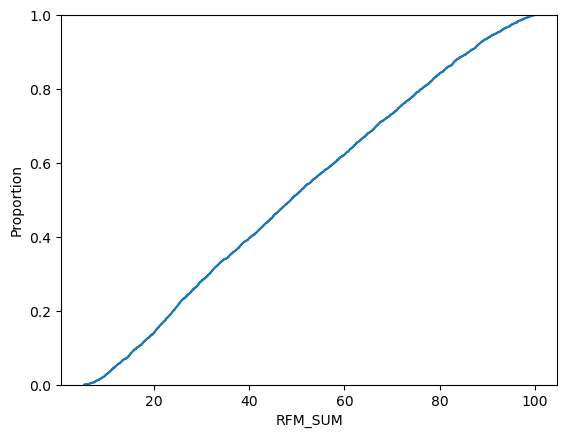

In [122]:
sns.ecdfplot(data=RFM["RFM_SUM"])

In [123]:
min(RFM["RFM_SUM"])

5.371999999999999

In [124]:
# LETS ASSIGN THE LOYALITY -- AS PER PERCENTILE

In [125]:
def loyality(x):
    if x<=25:
        return "Silver"
    elif x<=55:
        return "Gold"
    elif x<=77:
        return "Diamond"
    else:
        return "Platinum"
    

In [126]:
# use the above function
RFM["Loyality"]=RFM["RFM_SUM"].apply(loyality)

In [127]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_final,F_final,M_final,RFM_SUM,Loyality
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.76,17.20,99.79,55.807,Diamond
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.17,85.49,92.28,91.021,Platinum
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.08,69.79,76.84,66.973,Diamond
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.26,17.20,76.19,58.107,Diamond
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.26,17.20,28.35,20.387,Silver


In [128]:
RFM["Loyality"].value_counts()

Gold        1552
Diamond     1029
Silver       928
Platinum     830
Name: Loyality, dtype: int64

In [129]:
# we can do the clustering --- use of algorithm also--- KMEANS Clustering

In [130]:
Newdata=RFM["RFM_SUM"]
Newdata.head(2)

0    55.807
1    91.021
Name: RFM_SUM, dtype: float64

In [131]:
Newdata=pd.DataFrame(Newdata)

In [132]:
Newdata.head(2)

,RFM_SUM
0,55.807
1,91.021


In [133]:
from sklearn.cluster import KMeans

In [134]:
kmeans1=KMeans(max_iter=200,random_state=100,n_clusters=4)
y_means=kmeans1.fit_predict(Newdata)
y_means

array([1, 3, 1, ..., 2, 3, 1])

In [135]:
RFM["Cluster"]=kmeans1.labels_
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_final,F_final,M_final,RFM_SUM,Loyality,Cluster
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.76,17.20,99.79,55.807,Diamond,1
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.17,85.49,92.28,91.021,Platinum,3
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.08,69.79,76.84,66.973,Diamond,1
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.26,17.20,76.19,58.107,Diamond,1
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.26,17.20,28.35,20.387,Silver,0


In [136]:
RFM["Cluster"].value_counts()

0    1235
2    1122
1    1030
3     952
Name: Cluster, dtype: int64

In [137]:
RFM["Loyality"].value_counts()

Gold        1552
Diamond     1029
Silver       928
Platinum     830
Name: Loyality, dtype: int64

In [ ]:
#Evaluation of clustering

In [139]:
from sklearn.metrics import silhouette_score

In [ ]:
# silhouette_score range is -1 to 1, if our value is less than 0 
# that means the element in a cluster is not properly selected.
# if it is 0 , that means there is some overlapping in the cluster
# if the value is 0.5 to 1 .. we can say the clustering is ok

In [140]:
labels=kmeans1.labels_
silhouette_score(Newdata,labels)

0.5633325208789345

In [ ]:
# business pattern as per Day,Month,weekend,season,timing ...

In [141]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [142]:
df_final1=df_final.copy()

In [ ]:
# extraction of day, month,time  from datetime column

In [143]:
import datetime as dt

In [145]:
df_final1["Day"]=df_final1["InvoiceDate"].dt.day_name()
df_final1["Month_name"]=df_final1["InvoiceDate"].dt.month_name()
df_final1["Month"]=df_final1["InvoiceDate"].dt.month
df_final1["Hour"]=df_final1["InvoiceDate"].dt.hour

In [152]:
df_final1.tail()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month_name,Month,Hour
18561,581583,2011-12-09 12:23:00,13777.0,124.60,Friday,December,12,12
18562,581584,2011-12-09 12:25:00,13777.0,140.64,Friday,December,12,12
18563,581585,2011-12-09 12:31:00,15804.0,329.05,Friday,December,12,12
18564,581586,2011-12-09 12:49:00,13113.0,339.20,Friday,December,12,12
18565,581587,2011-12-09 12:50:00,12680.0,249.45,Friday,December,12,12


In [149]:
df_final1["Day"].value_counts()

Thursday     4038
Wednesday    3462
Tuesday      3189
Monday       2865
Friday       2835
Sunday       2177
Name: Day, dtype: int64

In [ ]:
# saturday is off day

In [150]:
df_final1["Month"].value_counts()

11    2660
12    2179
10    1930
9     1757
5     1559
6     1394
7     1331
3     1324
8     1283
4     1153
2     1003
1      993
Name: Month, dtype: int64

In [151]:
df_final1["Hour"].value_counts()

12    3133
13    2639
11    2279
14    2278
10    2230
15    2045
9     1395
16    1105
8      555
17     546
18     169
19     144
7       29
20      18
6        1
Name: Hour, dtype: int64

In [ ]:
# create the season-- summer, winter,monsoon

In [153]:
def cal_season(x):
    if x in [10,11,12,1]:
        return "Winter"
    elif x in [2,3]:
        return "Spring"
    elif x in [4,5,6]:
        return "Summer"
    else:
        return "Monsoon"

In [ ]:
# timing 

In [154]:
def cal_timing(x):
    if x in range(1,4):
        return "late Night"
    elif x in range(4,12):
        return "Morning"
    elif x in range(12,16):
        return "Afternoon"
    else:
        return "Evening"

In [155]:
df_final1["Season"]=df_final1["Month"].apply(cal_season)

In [156]:
df_final1["Timing"]=df_final1["Hour"].apply(cal_timing)

In [157]:
df_final1.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month_name,Month,Hour,Season,Timing
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,December,12,8,Winter,Morning
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,December,12,8,Winter,Morning
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,December,12,8,Winter,Morning
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,December,12,8,Winter,Morning
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,December,12,8,Winter,Morning


In [158]:
df_final1["Season"].value_counts()

Winter     7762
Monsoon    4371
Summer     4106
Spring     2327
Name: Season, dtype: int64

In [159]:
df_final1["Timing"].value_counts()

Afternoon    10095
Morning       6489
Evening       1982
Name: Timing, dtype: int64

In [ ]:
#creation of weekend/weekdays

In [160]:
df_final1["Weekend"]=np.where((df_final1.Day=="Saturday")|(df_final1.Day=="Sunday"),"Weekend","Weekday")

In [161]:
df_final1.head(2)

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month_name,Month,Hour,Season,Timing,Weekend
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,December,12,8,Winter,Morning,Weekday
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,December,12,8,Winter,Morning,Weekday


In [ ]:
#analysis the no. of invoice has been generated day wise

In [162]:
day_invoice_count=df_final1.groupby("Day")["InvoiceNo"].count()

In [163]:
day_invoice_count

Day
Friday       2835
Monday       2865
Sunday       2177
Thursday     4038
Tuesday      3189
Wednesday    3462
Name: InvoiceNo, dtype: int64

In [164]:
season_count=df_final1.groupby("Season")["InvoiceNo"].count().to_frame("invoice_count").reset_index()

In [165]:
season_count

,Season,invoice_count
0,Monsoon,4371
1,Spring,2327
2,Summer,4106
3,Winter,7762


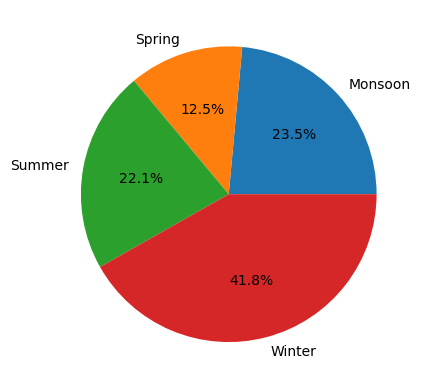

In [168]:
plt.pie(season_count.invoice_count,labels=season_count.Season,autopct="%.1f%%")
plt.show()

In [ ]:
# assignment --> plot the graph(pie, bar/count) for all the required columns

# (3)Recommendation Engine

In [ ]:
# Data filteration approach --use in product recommendation, service..,Movie,songs

collaborative filtering---find the DEGREE of similarity between the users
You have watched Movie A,C,D,F
ONE ANOTHER USER has watched the Movie A,C,D,X

FOR YOU --- The recommended movie is X
Dor other user--The recommended movie is F

content based filtering---work on the principal of product description(words)
Movie -- Tags, story line, Book contents, comments(user)

Hybrid filteration-- both meta(collaborative filtering plus content based filtering )

In [ ]:
# we are using collaborative filtering-- in online shopping 

In [169]:
df100=original_data.copy()

In [171]:
df100.head(2)

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [172]:
df100.isnull().sum()

InvoiceNo           0
StockCode           0
lower          540093
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [173]:
df100=df100.drop(["lower"],axis=1)

In [174]:
df100=df100.dropna(axis=0)

In [175]:
df100.shape

(406829, 8)

In [ ]:
#collaborative filtering approach--- degree of similarity between the customers

In [177]:
df100.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# to apply the function to find degree of similarity
#(1)We required a pivot table(matrix)--- stock code, customer id

In [178]:
custID_matrix=df100.pivot_table(index="CustomerID",columns="StockCode",values="Quantity",aggfunc="sum")

In [179]:
custID_matrix.head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
#we can apply the mapping approach to change nan --> 0

In [181]:
custID_matrix=custID_matrix.applymap(lambda x:1 if x>0 else 0)
custID_matrix.head(2)

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# we can apply the function --- cosine_similarity to calculate the degree of similarity

In [182]:
from sklearn.metrics.pairwise import cosine_similarity

In [184]:
similarity=cosine_similarity(custID_matrix)

In [185]:
similarity.shape

(4372, 4372)

In [186]:
similarity

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.06302187, ..., 0.11377602, 0.10936441,
        0.01282789],
       [0.        , 0.06302187, 1.        , ..., 0.        , 0.17090475,
        0.08326911],
       ...,
       [0.        , 0.11377602, 0.        , ..., 1.        , 0.01780047,
        0.        ],
       [0.        , 0.10936441, 0.17090475, ..., 0.01780047, 1.        ,
        0.09633351],
       [0.        , 0.01282789, 0.08326911, ..., 0.        , 0.09633351,
        1.        ]])

In [188]:
similarity[100]

array([0.        , 0.14481324, 0.08703883, ..., 0.0942809 , 0.18628514,
       0.1062988 ])

In [189]:
sorted(similarity[100],reverse=True)

[0.9999999999999997,
 0.32688969261277073,
 0.27343962911259007,
 0.2690370836538197,
 0.26827744801910997,
 0.2629502940535667,
 0.25333333333333335,
 0.2527226527352203,
 0.24930009553630061,
 0.24930009553630061,
 0.24911966213168743,
 0.24870800168690355,
 0.24850429767895826,
 0.24618298195866548,
 0.24494897427831785,
 0.24221202832779937,
 0.24133467269007217,
 0.24071739063762818,
 0.24053511772118197,
 0.24019223070763074,
 0.23624164222061242,
 0.2333333333333334,
 0.23268467259951844,
 0.232379000772445,
 0.2316562027516033,
 0.2311586975096188,
 0.2307082566667037,
 0.2277339348846351,
 0.22760968213343008,
 0.22658813492955776,
 0.22566921470262752,
 0.22391714737574012,
 0.22259728109199703,
 0.22135943621178655,
 0.22000763928677072,
 0.21945205394367923,
 0.21543753928536535,
 0.21538744758532144,
 0.21486575084548032,
 0.2143768803031489,
 0.21398024625545647,
 0.21333333333333337,
 0.2132996723676019,
 0.21244294245436937,
 0.21226745220209298,
 0.211925177130407,
 0.

In [190]:
final=pd.DataFrame(similarity)

In [191]:
final.head()

,0,1,2,3,4,5,6,7,8,9,...,4362,4363,4364,4365,4366,4367,4368,4369,4370,4371
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.025876,0.136641,0.094742,...,0.0,0.0,0.054656,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.0,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [192]:
final.columns=custID_matrix.index

In [193]:
final.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.025876,0.136641,0.094742,...,0.0,0.0,0.054656,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.0,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [195]:
final=final.set_index(custID_matrix.index)

In [196]:
final.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.025876,0.136641,0.094742,...,0.0,0.0,0.054656,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.0,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [ ]:
# for example we want to see the highest similar cutomer-- w.r.to cust id 12347

In [202]:
final.loc[12348].sort_values(ascending=False)

CustomerID
12348.0    1.000000
17940.0    0.381385
13027.0    0.348155
15232.0    0.292685
12548.0    0.286039
             ...   
14975.0    0.000000
14984.0    0.000000
14987.0    0.000000
14988.0    0.000000
15301.0    0.000000
Name: 12348.0, Length: 4372, dtype: float64

In [ ]:
# the cust id 12347 has the highest degree of similarity with cust id 17396

In [ ]:
# lets A  --- 12348
# B---- 17940

In [ ]:
# item purchased -- cust A

In [203]:
item_cust_A=set(custID_matrix.loc[12348].iloc[custID_matrix.loc[12348].to_numpy().nonzero()].index)

In [204]:
item_cust_A

{21211,
 21213,
 21725,
 21726,
 21967,
 21977,
 21980,
 21981,
 21982,
 21983,
 21985,
 22437,
 22616,
 22951,
 22952,
 23076,
 23077,
 23078,
 84988,
 84991,
 84992,
 'POST'}

In [205]:
len(item_cust_A)

22

In [ ]:
3 item purchased by cust B

In [206]:
item_cust_B=set(custID_matrix.loc[17940].iloc[custID_matrix.loc[17940].to_numpy().nonzero()].index)

In [207]:
item_cust_B

{21981, 21982, 21985, 21986, 22616}

In [208]:
len(item_cust_B)

5

In [209]:
Recommended_item_cust_A=item_cust_B-item_cust_A

In [210]:
Recommended_item_cust_A

{21986}

In [ ]:
# assignment --- try different cust id and find the item stock code we can recommend
# Try differy dataset and apply the same concept .

In [ ]:
# Finding the LIFE TIME Valuation of customer

In [ ]:
Customer life time valuation -- it is a marking scheme 
# quantitative analysis in business senario.. 
#sales promotion will de decided on the basis of CLTV

In [211]:
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank
0,12346.0,325,1,77183.60,162.5,746.5,4330.0
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0
4,12350.0,310,1,334.40,227.5,746.5,1230.0


In [212]:
df200=RFM_score.copy()

In [ ]:
# average order value--- contribution in business of a particular customer

In [215]:
df200["avg_order_value"]=df200["Monetary"]/df200["Frequency"]

In [216]:
df200.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,avg_order_value
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,77183.600000
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,615.714286
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,449.310000
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,1757.550000
4,12350.0,310,1,334.40,227.5,746.5,1230.0,334.400000


In [217]:
sum(df200["Frequency"])

18566

In [218]:
#purchase frquency
purchase_frequency=sum(df200["Frequency"])/df200.shape[0]

In [219]:
purchase_frequency

4.278866098179304

In [227]:
# Repeat rate
repeat_rate=df200[df200["Frequency"]>1].shape[0]/df200.shape[0]

In [228]:
repeat_rate

0.6561419681954367

In [ ]:
# 65 % customer has purchased more than 1

In [229]:
churn_rate=1-repeat_rate
churn_rate

0.3438580318045633

In [ ]:
# chances that about 34% customer can churn

In [ ]:
# profit margin & life time valuation

In [230]:
df200["profit_margin"]=df200["Monetary"]*0.20
#customer value
df200["CLVT"]=df200["avg_order_value"]*purchase_frequency/churn_rate

In [232]:
df200.head(100)

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,avg_order_value,profit_margin,CLVT
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,77183.600000,15436.720,960449.542627
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,615.714286,862.000,7661.763692
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,449.310000,359.448,5591.078727
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,1757.550000,351.510,21870.424464
4,12350.0,310,1,334.40,227.5,746.5,1230.0,334.400000,66.880,4161.173190
...,...,...,...,...,...,...,...,...,...,...
95,12462.0,18,2,1189.59,3209.5,1910.5,2884.0,594.795000,237.918,7401.450382
96,12463.0,53,4,1344.78,2090.5,3028.0,3029.0,336.195000,268.956,4183.509631
97,12464.0,10,8,1212.05,3615.0,3828.0,2902.0,151.506250,242.410,1885.298283
98,12465.0,17,2,742.19,3272.5,1910.5,2310.0,371.095000,148.438,4617.794752


In [ ]:
# assignment -- we can built a regression model target variable CLVT.

In [ ]:
#assigments:-
# FIND THE TOP 10 SELLING PRODUCTS
# TOP SELLING PRODUCT COUNTRY WISE
# SALES TREND -- LINE PLOT 
# MEAN SALES MONTH-WISE--> WHICH MONTH HAS AVERAGE SALE,BELOW AVERAGE,ABOVE AVERAGE
# PRODUCT WISE MONTHLY SALES